In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading Dataset

In [4]:
df=pd.read_csv("iris.csv")

### Data Preprocessing

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
print("Shape of the dataset")
print(df.shape)

(150, 6)


We can see that the dataset is having 6 rows and 150 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Null Value Analysis

In [11]:
df.isnull().sum().sum()

0

Hence, in the dataset there is no Null values.

#### Outlier Analysis 

In [18]:
# Calculating the IQR for each numerical feature

# Select only numeric columns
numeric_data = df.select_dtypes(include=np.number)

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

IQR

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64

In [22]:
print(numeric_data.shape)

(150, 5)


In [27]:
# Defining the threshold for outliers
threshold = 1.5
#common threshold

# Identifing outliers
outliers = (numeric_data < (Q1 - threshold * IQR)) | (numeric_data > (Q3 + threshold * IQR))

outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


Hence. there is no Outliers in the following dataset

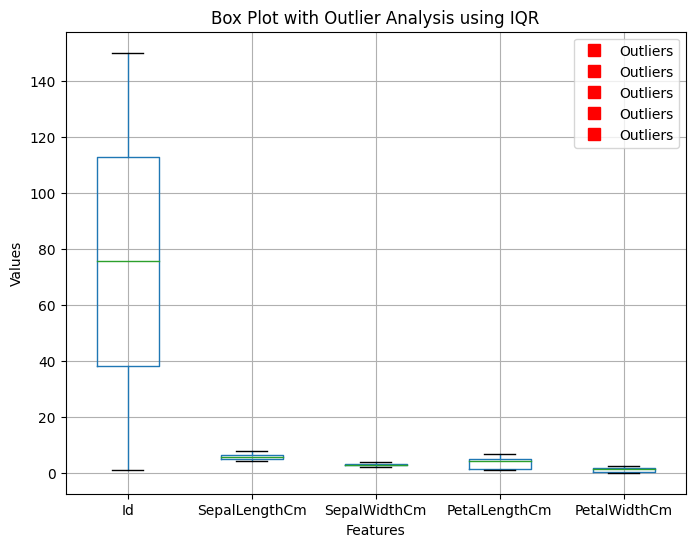

In [30]:
# Plotting a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
numeric_data.boxplot(showfliers=False)  # Exclude outliers from the box plot
for i in range(len(numeric_data.columns)):
    plt.plot([], [], 'rs', markersize=8, label='Outliers')  # Red square for outliers
plt.title('Box Plot with Outlier Analysis using IQR')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(range(1, len(numeric_data.columns) + 1), numeric_data.columns)  # Set x-axis labels to feature names
plt.legend()
plt.show()

We can also see the same in the Box plot

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

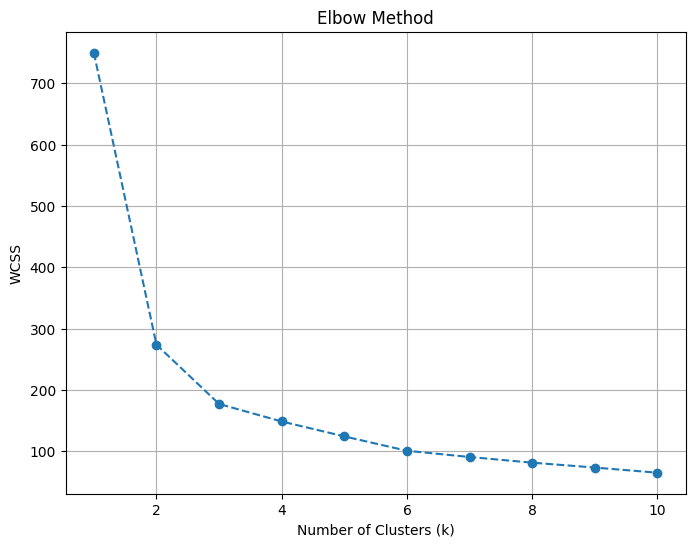

In [34]:
# Step 4: Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares

# Try different values of k (number of clusters)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances to the closest centroid

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


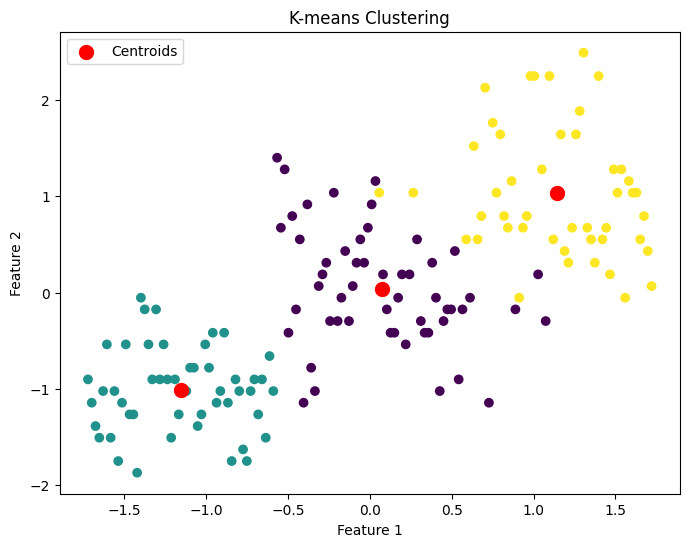

In [52]:
# Step 5: Performing K-means clustering with the optimal number of clusters
optimal_k = 3  # Replace with the optimal number of clusters obtained from the elbow method

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit_predict(X_scaled)
cluster_labels = kmeans.labels_

# Step 6: Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='o', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
